## Speed tachometer

### Basic infos

In [43]:
Ra = 1
Km = 10
J  = 2
b  = 0.5
Kb = 0.1
Ka = 54
Kt = 1


### Env

In [44]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

### Open-loop System


   -1
---------
2 s + 1.5



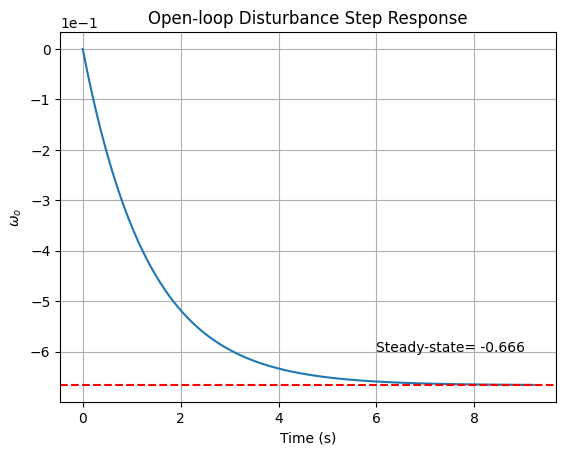

-0.6659999999999988


In [45]:
sys1 = ctl.tf([1], [J, b])
sys2 = ctl.tf([Km*Kb/Ra], [1])

sys_o = -ctl.feedback(sys1, sys2)

print(sys_o)

[T1, y_o] = ctl.step_response(sys_o)

## Get Steady-state error
sse_o = y_o[-1]

plt.plot(T1, y_o)
plt.title('Open-loop Disturbance Step Response')
plt.xlabel('Time (s)')
plt.ylabel(r'$\omega_o$')
plt.grid()
plt.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
plt.text(6, sse_o*0.9, f'Steady-state= {round(sse_o, 4)}')
plt.axhline(sse_o, c = 'r', ls='--')
plt.show()

print(sse_o)

### Close-loop System

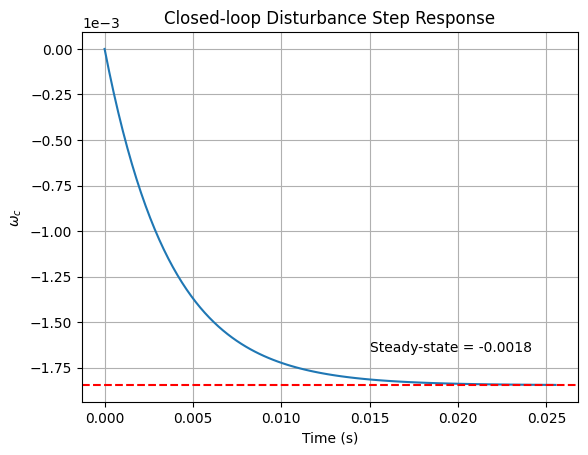

In [46]:
sys1 = ctl.tf([1], [J, b])
sys2 = ctl.tf([Ka*Kt], [1])
sys3 = ctl.tf([Kb], [1])
sys4 = ctl.tf([Km/Ra], [1])

sys_a = ctl.parallel(sys2, sys3)
sys_b = ctl.series(sys_a, sys4)
sys_c = ctl.feedback(sys1, sys_b)

sys_c = -sys_c

[T2, y_c] = ctl.step_response(sys_c)

## Get Steady-state error
sse_c = y_c[-1]

plt.plot(T2, y_c)
plt.title('Closed-loop Disturbance Step Response')
plt.xlabel('Time (s)')
plt.ylabel(r'$\omega_c$')
plt.grid()

plt.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')

plt.text(0.015, sse_c*0.9, f'Steady-state = {round(sse_c, 4)}')

plt.axhline(sse_c, c = 'r', ls='--')

plt.show()

### Change parameter of CLDSR

In [67]:
def get_close_loop(Ka: float):
    Ra = 1
    Km = 10
    # Km = 200
    J  = 2
    b  = 0.5
    Kb = 0.1
    # Ka = 54
    Kt = 1
    
    sys1 = ctl.tf([1], [J, b])
    sys2 = ctl.tf([Ka*Kt], [1])
    sys3 = ctl.tf([Kb], [1])
    sys4 = ctl.tf([Km/Ra], [1])

    sys_a = ctl.parallel(sys2, sys3)
    sys_b = ctl.series(sys_a, sys4)
    sys_c = ctl.feedback(sys1, sys_b)

    sys_c = -sys_c

    [T2, y_c] = ctl.step_response(sys_c)
    
    return T2, y_c

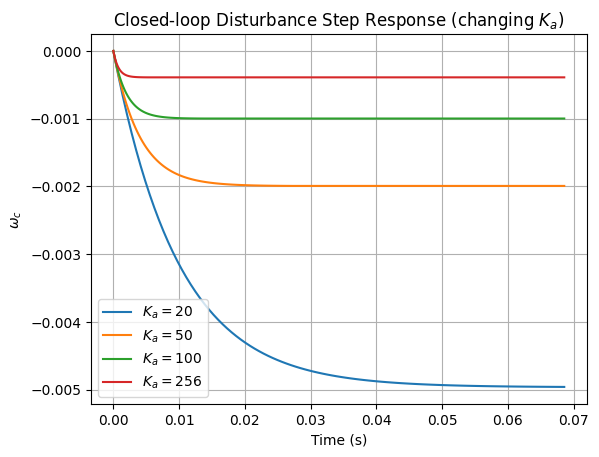

In [72]:
[T1, y1] = get_close_loop(20)
[T2, y2] = get_close_loop(50)
[T3, y3] = get_close_loop(100)
[T4, y4] = get_close_loop(256)

T2[-1] = (T1[-1])
T3[-1] = (T1[-1])
T4[-1] = (T1[-1])

y2[-1] = (y2[-1])
y3[-1] = (y3[-1])
y4[-1] = (y4[-1])

plt.plot(T1, y1, label=r'$K_a = 20$')
plt.plot(T2, y2, label=r'$K_a = 50$')
plt.plot(T3, y3, label=r'$K_a = 100$')
plt.plot(T4, y4, label=r'$K_a = 256$')

plt.title(r'Closed-loop Disturbance Step Response (changing $K_a$)')
plt.xlabel('Time (s)')
plt.ylabel(r'$\omega_c$')
plt.grid()


plt.legend()

plt.show()


### Numeral Computation

In [47]:
T1 = np.log10(T1[1::])
T2 = np.log10(T2[1::])

In [48]:
y_o = y_o[1::]
y_c = y_c[1::]

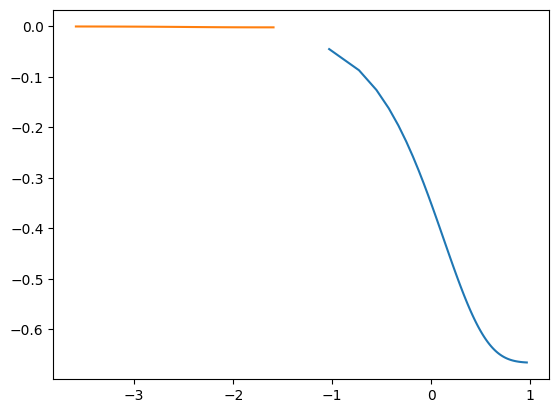

In [49]:
plt.plot(T1, y_o, label='yo')
plt.plot(T2, y_c, label='yc')

plt.show()

In [50]:
import sympy

t, s = sympy.symbols('t, s')

f = -1/(2 * s**2 + 1.5 * s)


In [51]:
omega = sympy.inverse_laplace_transform(f, s, t)

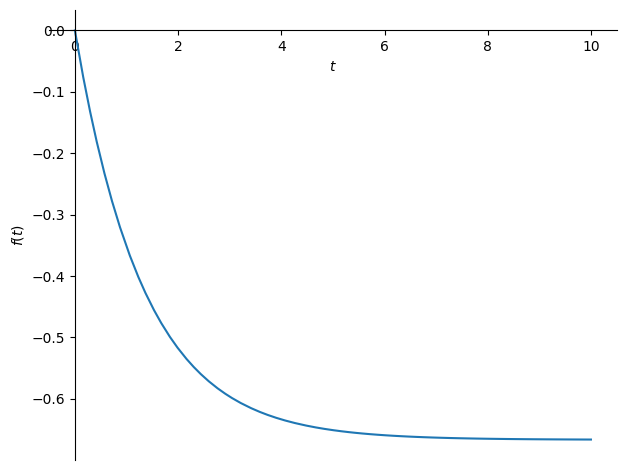

In [52]:
from sympy.plotting import plot

plot(omega, (t, 0, 10))

In [53]:
sympy.limit(omega, t, sympy.oo)

-2/3

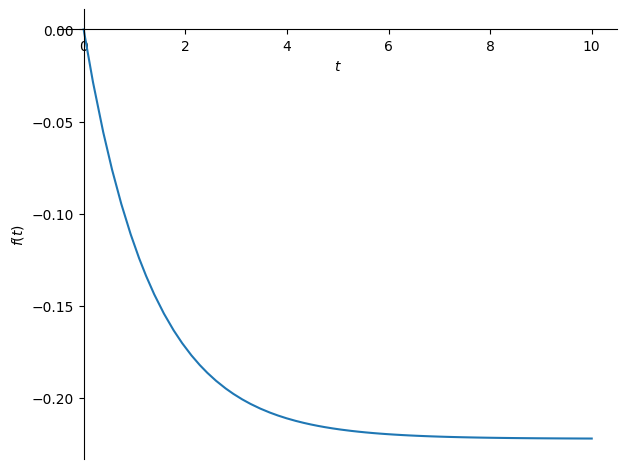

In [54]:
b = -4/9 *sympy.exp(-3*t/8) *sympy.sinh(3*t/8)

plot(b, (t, 0, 10))

In [55]:
c = 523500/(s**3 + 87.35 * s**2 + 10470 * s)

F = sympy.inverse_laplace_transform(c, s, t)

# from sympy.plotting import plot

# plot(F, (t, 0, 10))

PolynomialError: RisingFactorial(_t + 1, 1.0) contains an element of the set of generators.

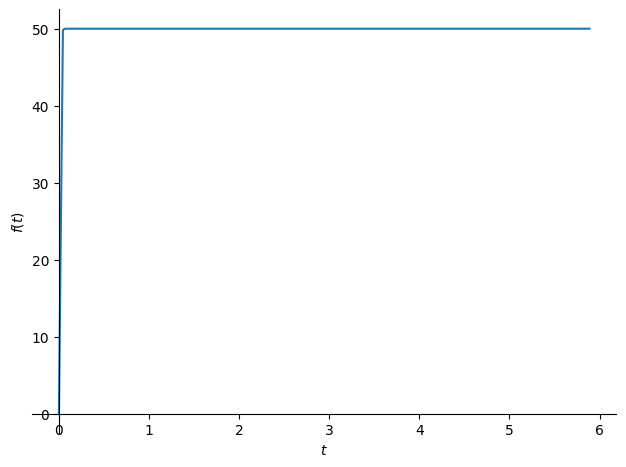

In [ ]:
from sympy.plotting import plot

plot(F, (t, 0, 10))